##**Import libraries**##

In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 423, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 319, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 193, in _build_one
    wheel_path = _build_one_inside_env(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 240, in _build_one_inside_env

##**Import Data**##

In [ ]:
# from google.colab import files

# # Upload ZIP files through a file dialog
# uploaded = files.upload()

Saving SC_DNA_adj.zip to SC_DNA_adj (1).zip
Saving SC_ESS.zip to SC_ESS (1).zip


In [ ]:
import zipfile
import os

# Extract SC_DNA_adj.zip
with zipfile.ZipFile('SC_DNA_adj.zip', 'r') as zip_ref:
    zip_ref.extractall('SC_DNA_adj')

# Extract SC_ESS.zip
with zipfile.ZipFile('SC_ESS.zip', 'r') as zip_ref:
    zip_ref.extractall('SC_ESS')

In [ ]:
# Check if the files were extracted
print("SC_DNA_adj contents:", os.listdir('SC_DNA_adj')[:10])  # Show the first 10 files
print("SC_ESS contents:", os.listdir('SC_ESS'))

SC_DNA_adj contents: ['SC_DNA_adj']
SC_ESS contents: ['SC_ESS']


In [ ]:
import pandas as pd

# Load one example gene adjacency matrix (choose a specific gene CSV)
example_gene_csv = 'SC_DNA_adj/SC_DNA_adj/YBL011W .csv'  # Replace with any gene filename from the list
adj_matrix = pd.read_csv(example_gene_csv, header=None)

print(f"Adjacency matrix for {example_gene_csv}:")

Adjacency matrix for SC_DNA_adj/SC_DNA_adj/YBL011W .csv:


In [ ]:
print(adj_matrix.head())  # Show the first few rows

     0      1      2      3      4      5      6      7      8      9    ...  \
0    NaN  AAAAA  CAAAA  GAAAA  TAAAA  AAAAC  AAAAG  AAAAT  AAACA  TAAAC  ...   
1  AAAAA      6      0      0      0      8      6      6      0      0  ...   
2  CAAAA      8      0      0      0      8      6      6      0      0  ...   
3  GAAAA      8      0      0      0      8      6      6      0      0  ...   
4  TAAAA      8      0      0      0      8      0      6      0      0  ...   

     857    858    859    860    861    862    863    864    865    866  
0  TTTCG  TTTCT  TTTGA  TTTGC  TTTGG  TTTGT  TTTTA  TTTTC  TTTTG  TTTTT  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 867 columns]


In [ ]:
# Load the SC_ESS.csv file
sc_ess_df = pd.read_csv('SC_ESS/SC_ESS/SC_ESS.csv')

# Inspect the essentiality file
print("SC_ESS file preview:")
print(sc_ess_df.head())  # Show the first few rows

SC_ESS file preview:
      Gene Essential CEG
0  YJL074C     Essential
1  YOR151C     Essential
2  YKL173W     Essential
3  YJR064W     Essential
4  YPL235W     Essential


In [ ]:
print(sc_ess_df['Essential CEG'].value_counts())  # Count essential vs non-essential

Essential CEG
Non-essential    4373
Essential        1036
Name: count, dtype: int64


##**Working on Alaki data**##

In [ ]:
import numpy as np

nodes_alaki = np.array(["aaaaa", "bbbbb", "ccccc"])
adj_matrix_alaki = np.array([[4, 6, 0],
                             [1, 0, 2],
                             [0, 6, 0]])

In [ ]:
nodes_alaki

array(['aaaaa', 'bbbbb', 'ccccc'], dtype='<U5')

In [ ]:
adj_matrix_alaki

array([[0, 6, 3],
       [1, 0, 2],
       [0, 0, 4]])

In [ ]:
# Create a dictionary to map node labels to numerical indices
node_mapping_alaki = {node: i for i, node in enumerate(nodes_alaki)}

In [ ]:
node_mapping_alaki

{'aaaaa': 0, 'bbbbb': 1, 'ccccc': 2}

In [ ]:
import networkx as nx

# Create a NetworkX graph from the adjacency matrix, using numerical indices for nodes
#Graph_alaki = nx.from_numpy_array(adj_matrix_alaki, node_mapping_alaki)

Graph_alaki = nx.from_numpy_array(adj_matrix_alaki)
Graph_alaki = nx.relabel_nodes(Graph_alaki, node_mapping_alaki)

In [ ]:
Graph_alaki

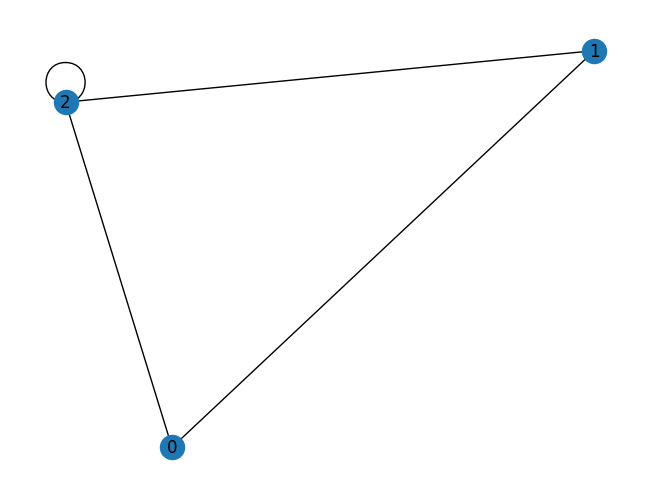

In [ ]:
nx.draw(Graph_alaki, with_labels=True)

In [ ]:
Graph_alaki.nodes

NodeView((0, 1, 2))

In [ ]:
Graph_alaki.edges

EdgeView([(0, 1), (0, 2), (1, 2), (2, 2)])

In [ ]:
import torch

# Get the edge list as a tensor
edge_index_alaki = torch.tensor(list(Graph_alaki.edges)).t().contiguous()

In [ ]:
edge_index_alaki

tensor([[0, 0, 1, 2],
        [1, 2, 2, 2]])

In [ ]:
Graph_alaki.graph['edge_index_alaki'] = edge_index_alaki

In [ ]:
Graph_alaki

In [ ]:
Graph_alaki.graph['edge_index_alaki']

tensor([[0, 0, 1, 2],
        [1, 2, 2, 2]])

In [ ]:
num_nodes_alaki = Graph_alaki.number_of_nodes()

In [ ]:
num_nodes_alaki

3

In [ ]:
constant_features = torch.ones(num_nodes_alaki, 1)  # assign a constant feature of 1 to all nodes
one_hot_features = torch.eye(num_nodes_alaki) # assign unique ID features to each node

In [ ]:
constant_features

tensor([[1.],
        [1.],
        [1.]])

In [ ]:
one_hot_features

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
Graph_alaki.graph['node_features_alaki'] = one_hot_features

In [ ]:
Graph_alaki.graph['node_features_alaki']

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

##**Creating graph for a single csv file**##

In [ ]:
example_gene_csv = 'SC_DNA_adj/SC_DNA_adj/YBL011W .csv'
df = pd.read_csv(example_gene_csv, header=None)
nodes = df.iloc[0, 1:].values
adj_matrix = df.iloc[1:, 1:].values.astype(int)

# Create a dictionary to map node labels to numerical indices
node_mapping = {node: i for i, node in enumerate(nodes)}

import networkx as nx

# Create a NetworkX graph from the adjacency matrix, using numerical indices for nodes
G = nx.from_numpy_array(adj_matrix, node_mapping)

In [ ]:
# Extract gene name from the file name
gn = os.path.basename(example_gene_csv).replace(' .csv', '')

In [ ]:
gn

'YBL011W'

In [ ]:
# Check the essentiality from SC_ESS.csv
gn_ess_row = sc_ess_df[sc_ess_df['Gene'] == gn]

In [ ]:
gn_ess_row

,Gene,Essential CEG
4637,YBL011W,Non-essential


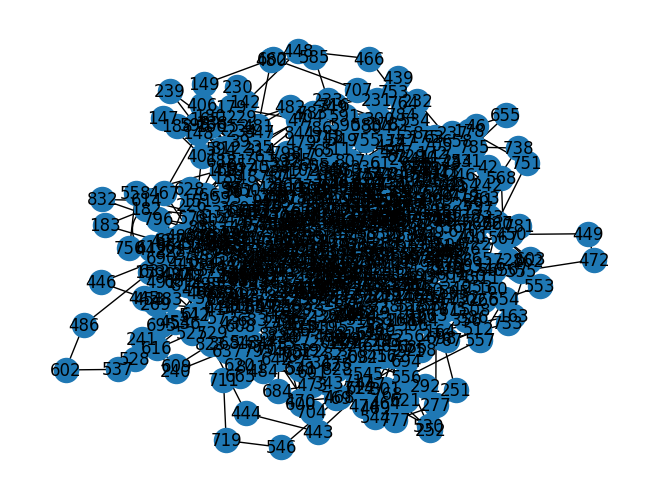

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
import torch

# Get the edge list as a tensor
edge_index = torch.tensor(list(G.edges)).t().contiguous()
G.graph['edge_index'] = edge_index

In [ ]:
num_nodes = G.number_of_nodes()
constant_features = torch.ones(num_nodes, 1)  # assign a constant feature of 1 to all nodes
G.graph['x'] = constant_features

##**Working on several csv files**##

In [ ]:
import pandas as pd
import networkx as nx
import torch
import os

# Load SC_ESS.csv to get gene essentiality
sc_ess_df = pd.read_csv('SC_ESS/SC_ESS/SC_ESS.csv')

# Function to construct a graph for each gene CSV and assign edge_index, x, and y attributes
def construct_graph(gene_csv, sc_ess_df):
    # Load the gene adjacency matrix CSV
    df = pd.read_csv(gene_csv, header=None)

    # Extract nodes (5-mers of DNA sequence) and adjacency matrix
    nodes = df.iloc[0, 1:].values  # First row (excluding the first column)
    adj_matrix = df.iloc[1:, 1:].values.astype(int)  # Adjacency matrix

    # Create a dictionary to map node labels to numerical indices
    node_mapping = {node: i for i, node in enumerate(nodes)}

    # Create a NetworkX graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)

    # Get the edge list as a tensor for PyTorch Geometric
    edge_index = torch.tensor(list(G.edges)).t().contiguous()  # Transpose and make contiguous
    G.graph['edge_index'] = edge_index

    # Create node features (for simplicity, constant value of 1 for all nodes)
    num_nodes = G.number_of_nodes()
    constant_features = torch.ones(num_nodes, 1)  # 1 feature of value 1 for all nodes
    G.graph['x'] = constant_features

    # Extract gene name from the file name
    gene_name = os.path.basename(gene_csv).replace(' .csv', '')

    # Check the essentiality from SC_ESS.csv
    gene_ess_row = sc_ess_df[sc_ess_df['Gene'] == gene_name]

    if not gene_ess_row.empty:
        # If the gene is essential, set y to 1, otherwise to 0
        if gene_ess_row['Essential CEG'].values[0] == 'Essential':
            G.graph['y'] = torch.tensor([1])
        else:
            G.graph['y'] = torch.tensor([0])
    else:
        # If the gene is not found, raise an error
        raise ValueError(f"Gene {gene_name} not found in SC_ESS.csv")

    return G

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

# Example usage for a single gene CSV
example_gene_csv = 'SC_DNA_adj/SC_DNA_adj/YMR125W .csv'
G = construct_graph(example_gene_csv, sc_ess_df)

# Inspect the created graph's attributes
print("Edge Index:")
print(G.graph['edge_index'])

print("Node Features (x):")
print(G.graph['x'])

print("Graph Label (y):")
print(G.graph['y'])

<IPython.core.display.Javascript object>

Edge Index:
tensor([[  0,   0,   0,  ..., 824, 825, 826],
        [  0,   4,   5,  ..., 826, 826, 826]])
Node Features (x):
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        

In [ ]:
# List all CSV files in SC_DNA_adj directory
adj_dir = 'SC_DNA_adj/SC_DNA_adj'
gene_csvs = [os.path.join(adj_dir, file) for file in os.listdir(adj_dir) if file.endswith('.csv')]

# Construct graph for each gene
graphs = []
for gene_csv in gene_csvs:
    try:
        G = construct_graph(gene_csv, sc_ess_df)
        graphs.append(G)
    except ValueError as e:
        print(e)  # If a gene is not found in SC_ESS.csv, handle the exception

Gene YDR034W-B not found in SC_ESS.csv
Gene YBL100W-B not found in SC_ESS.csv
Gene YGR155W not found in SC_ESS.csv
Gene YKL139W not found in SC_ESS.csv
Gene YJL198W not found in SC_ESS.csv
Gene YNL145W not found in SC_ESS.csv
Gene YBR112C not found in SC_ESS.csv
Gene YGR027W-A not found in SC_ESS.csv
Gene YDR316W-A not found in SC_ESS.csv
Gene YPR137C-A not found in SC_ESS.csv
Gene YDR292C not found in SC_ESS.csv
Gene YJL077W-B not found in SC_ESS.csv
Gene YGL213C not found in SC_ESS.csv
Gene YPL152W-A not found in SC_ESS.csv
Gene YDR210W-A not found in SC_ESS.csv
Gene YHR175W-A not found in SC_ESS.csv
Gene YLR406C-A not found in SC_ESS.csv
Gene YLR182W not found in SC_ESS.csv
Gene YOR343W-B not found in SC_ESS.csv
Gene YBR196C-B not found in SC_ESS.csv
Gene YJR151W-A not found in SC_ESS.csv
Gene YLR157C-B not found in SC_ESS.csv
Gene YOL103W-B not found in SC_ESS.csv
Gene YDL089W not found in SC_ESS.csv
Gene YDR461W not found in SC_ESS.csv
Gene YHR086W-A not found in SC_ESS.csv
Gene Y

In [ ]:
len(graphs)

5409

In [ ]:
graphs[0]

In [ ]:
graphs[0].graph['y']

tensor([0])

In [ ]:
from torch_geometric.data import Data
import torch

def convert_nx_to_pyg(G):
    # Convert edge list to edge_index tensor
    edge_index = G.graph['edge_index']

    # Get node features (x)
    x = G.graph['x']

    # Get label (y)
    y = G.graph['y']

    # Create a PyG Data object
    pyg_data = Data(x=x, edge_index=edge_index, y=y)

    return pyg_data

# Convert all NetworkX graphs to PyG Data objects
pyg_graphs = [convert_nx_to_pyg(G) for G in graphs]

In [ ]:
pyg_graphs[0]

Data(x=[196, 1], edge_index=[2, 212], y=[1])

In [ ]:
pyg_graphs[0].y

tensor([0])

##**Split dataset into training, validation, and test sets**##

In [ ]:
from torch_geometric.data import DataLoader
from sklearn.model_selection import train_test_split

# Split the pyg_graphs dataset into training, validation, and test sets
train_graphs, temp_graphs = train_test_split(pyg_graphs, test_size=0.3, random_state=42)  # 70% train, 30% temp
valid_graphs, test_graphs = train_test_split(temp_graphs, test_size=0.5, random_state=42)  # Split temp into 15% valid, 15% test

In [ ]:
# Display the size of each split
print(f'Training graphs: {len(train_graphs)}')
print(f'Validation graphs: {len(valid_graphs)}')
print(f'Test graphs: {len(test_graphs)}')

Training graphs: 3786
Validation graphs: 811
Test graphs: 812


In [ ]:
# Load the data sets into DataLoader to create efficient data loaders for training, validation, and testing.
# Specifies the batch size for training, meaning 32 graphs will be processed in each batch.
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_graphs, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False, num_workers=0)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
# Print an example from the DataLoader to check
for batch in train_loader:
    print(batch)
    break

DataBatch(x=[18084, 1], edge_index=[2, 30060], y=[32], batch=[18084], ptr=[33])


In [ ]:
i = 0
li = []
for batch in train_loader:
  li.append(batch)
  i += 1

In [ ]:
print(i)
print(li[0])
print(li[100])
print(li[0].x)
print(li[0].batch)

119
DataBatch(x=[20426, 1], edge_index=[2, 35589], y=[32], batch=[20426], ptr=[33])
DataBatch(x=[20093, 1], edge_index=[2, 34741], y=[32], batch=[20093], ptr=[33])
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])
tensor([ 0,  0,  0,  ..., 31, 31, 31])


##**Graph Prediction Model**##

In [ ]:
# Importing Libraries
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import DataLoader
import copy

In [ ]:
# Setting Device

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

Device: cuda


In [ ]:
# Define model parameters
args = {
    'device': device,
    'num_layers': 5,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.001,
    'epochs': 30,
}
args

{'device': 'cuda',
 'num_layers': 5,
 'hidden_dim': 256,
 'dropout': 0.5,
 'lr': 0.001,
 'epochs': 30}

In [ ]:
# GCN class for the graph
class GCN(torch.nn.Module): # Define the GCN (Graph Convolutional Network) class
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout, return_embeds=False):
        super(GCN, self).__init__()

        self.convs = torch.nn.ModuleList()
        self.convs.append(GCNConv(input_dim, hidden_dim))

        for _ in range(num_layers - 2):
            self.convs.append(GCNConv(hidden_dim, hidden_dim))
        self.convs.append(GCNConv(hidden_dim, output_dim))

        self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_dim) for _ in range(num_layers - 1)])
        self.softmax = torch.nn.LogSoftmax(dim=1)
        self.dropout = dropout
        self.return_embeds = return_embeds # Flag to return embeddings without classification

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs[:-1]):
            x = conv(x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.convs[-1](x, edge_index)

        if not self.return_embeds: # If return_embeds is False, apply softmax
            x = self.softmax(x)

        return x

In [ ]:
# GCN for graph-level classification
class GCN_Graph(torch.nn.Module): # Define GCN_Graph for classifying whole graphs
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Node embedding model
        self.gnn_node = GCN(input_dim=1, hidden_dim=hidden_dim, output_dim=hidden_dim, num_layers=num_layers, dropout=dropout, return_embeds=True)

        # Global pooling layer
        self.pool = global_mean_pool

        # Linear layer for graph classification
        self.linear = torch.nn.Linear(hidden_dim, output_dim)

    def reset_parameters(self):
        self.gnn_node.reset_parameters()
        self.linear.reset_parameters()

    def forward(self, batched_data):
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch

        # Generate node embeddings using GCN
        node_embeds = self.gnn_node(x, edge_index)

        # Aggregate node embeddings into graph embeddings
        graph_embeds = self.pool(node_embeds, batch)

        # Predict graph-level property (essential or non-essential)
        out = self.linear(graph_embeds)

        # Reshape output to be [batch_size] instead of [batch_size, 1]
        return out.view(-1)

In [ ]:
# Training function
def train(model, device, data_loader, optimizer, loss_fn):
    model.train()
    total_loss = 0

    for step, batch in enumerate(data_loader): # Iterate over batches of data
        batch = batch.to(device)

        # Skip graphs with no nodes
        if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
            continue

        # Filter labeled data (ignoring NaN labels)
        is_labeled = batch.y == batch.y

        optimizer.zero_grad()

        out = model(batch) # Perform forward pass

        # Compute loss only on labeled data
        loss = loss_fn(out[is_labeled], batch.y[is_labeled].float())

        # Backpropagate the loss
        loss.backward()

        # Update model parameters
        optimizer.step()

        total_loss += loss.item() # Accumulate total loss

    return total_loss / len(data_loader) # Return average loss over the dataset

In [ ]:
# Evaluation function
def eval(model, device, loader):
    model.eval()
    y_true = [] # Store ground truth labels
    y_pred = [] # Store predicted labels

    for step, batch in enumerate(loader): # Iterate over batches of data
        batch = batch.to(device) # Move batch to device (CPU or GPU)

        if batch.x.shape[0] == 1: # Skip empty graphs
            continue

        with torch.no_grad(): # Disable gradient computation
            pred = model(batch) # Get predictions from the model

        y_true.append(batch.y.view(pred.shape).detach().cpu()) # Append true labels
        y_pred.append(pred.detach().cpu()) # Append predicted labels

    y_true = torch.cat(y_true, dim=0).numpy() # Concatenate and convert true labels to numpy
    y_pred = torch.cat(y_pred, dim=0).numpy() # Concatenate and convert predicted labels to numpy

    # Binarize predictions (logits -> probabilities -> binary)
    y_pred = (torch.sigmoid(torch.tensor(y_pred)) > 0.5).numpy()

    accuracy = (y_pred == y_true).mean() # Compute accuracy
    return accuracy

In [ ]:
# Instantiate the model
model = GCN_Graph(args['hidden_dim'], output_dim=1, num_layers=args['num_layers'], dropout=args['dropout']).to(device)

In [ ]:
import copy

model.reset_parameters()

# Instantiate the optimizer, and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=args['lr']) # Adam optimizer
loss_fn = torch.nn.BCEWithLogitsLoss() # Binary cross-entropy loss for classification

best_model = None
best_valid_acc = 0

# Training loop
for epoch in range(1, args['epochs'] + 1):
    print(f'Epoch {epoch}:')

    # Train the model
    train_loss = train(model, device, train_loader, optimizer, loss_fn)
    print(f'Training loss: {train_loss:.4f}')

    # Evaluate on validation and test sets
    train_acc = eval(model, device, train_loader)
    valid_acc = eval(model, device, valid_loader)
    test_acc = eval(model, device, test_loader)

    print(f'Train Acc: {train_acc:.4f}, Valid Acc: {valid_acc:.4f}, Test Acc: {test_acc:.4f}')

    # Save best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)

Epoch 1:
Training loss: 0.4993
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 2:
Training loss: 0.4869
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 3:
Training loss: 0.4861
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 4:
Training loss: 0.4862
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 5:
Training loss: 0.4873
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 6:
Training loss: 0.4854
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 7:
Training loss: 0.4838
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 8:
Training loss: 0.4848
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 9:
Training loss: 0.4825
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 10:
Training loss: 0.4867
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 11:
Training loss: 0.4849
Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968
Epoch 12:
Training loss: 0.4839
Train Acc: 0.8111, V

In [ ]:
# Evaluate best model
train_acc = eval(best_model, device, train_loader)
valid_acc = eval(best_model, device, valid_loader)
test_acc = eval(best_model, device, test_loader)

print(f'Best Model - Train Acc: {train_acc:.4f}, Valid Acc: {valid_acc:.4f}, Test Acc: {test_acc:.4f}')


Best Model - Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968


In [ ]:
print(len(train_loader.dataset), len(valid_loader.dataset), len(test_loader.dataset))


3786 811 812


In [ ]:
for step, batch in enumerate(train_loader):
    batch = batch.to(device)
    out = model(batch)
    print(out[:5])  # Check a few outputs
    print(batch.y[:5])  # Check corresponding ground truth
    break


tensor([-1.7971, -1.7977, -1.1837, -1.4539, -1.8428], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([1, 0, 1, 0, 0], device='cuda:0')


In [ ]:
for step, batch in enumerate(train_loader):
    print(batch.x[:5])  # Print input node features
    print(batch.y[:5])  # Print target labels
    break

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
tensor([0, 0, 0, 0, 0])
